In [4]:
import tensorflow as tf

x_data = [[1,2,1],[1,3,2],[1,3,4],[1,5,5],[1,7,5],[1,2,5],[1,6,6],[1,7,7]]
y_data = [[0,0,1],[0,0,1],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0]]

#test data를 꼭 따로 둬야 함
x_test = [[2,1,1],[3,1,2],[3,3,4]]
y_test = [[0,0,1],[0,0,1],[0,0,1]]

X = tf.placeholder("float",[None,3])
Y = tf.placeholder("float",[None,3])
W = tf.Variable(tf.random_normal([3,3]))
b = tf.Variable(tf.random_normal([3]))

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-10).minimize(cost)

# 테스트 모델의 정확성 측정
prediction = tf.argmax(hypothesis,1)
is_correct = tf.equal(prediction,tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))


with tf.Session() as sess :
    
    sess.run(tf.global_variables_initializer())
    for step in range(201):
        cost_val, W_val, _ = sess.run([cost,W,optimizer],
                                     feed_dict={ X: x_data,Y:y_data})
        print(step, cost_val, W_val)

    print("Prediction : ",sess.run(prediction,feed_dict={X:x_test}))
    # Calculate the accuracy
    print("Accuracy : ",sess.run(accuracy,feed_dict={X:x_test,Y:y_test}))

0 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
1 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
2 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
3 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
4 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
5 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
6 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
7 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]


172 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
173 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
174 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
175 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
176 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
177 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
178 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.07167324 -0.6077964 ]
 [-0.4629606  -0.02906075 -0.25153285]]
179 4.6166506 [[ 0.9617566   1.1860163  -0.5166012 ]
 [-1.4726235   0.071673

In [5]:
import numpy as np

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X,W)+b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess =tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost,hypothesis,train],feed_dict={X:x_data,Y:y_data})
    if step % 500 == 0 : 
        print(step,"cost: ",cost_val,"\nPrediction:\n",hy_val)

0 cost:  122291360000.0 
Prediction:
 [[246595.17]
 [498488.28]
 [391721.28]
 [274004.22]
 [323278.  ]
 [326018.34]
 [298657.4 ]
 [380797.1 ]]
500 cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1000 cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1500 cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
2000 cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [6]:
import tensorflow as tf
import numpy as np

def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

xy = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)
xy = min_max_scaler(xy) 
#가장 큰 값을 1, 가장 작은 값을 0으로 잡은 다음 그 사이 값을 0~1 사이의 범위의 숫자로
#데이터를 normalized 해 줌 -> min_max_scaler
print(xy)

x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None,4])
Y = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.random_normal([4,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.matmul(X,W)+b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

sess =tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost,hypothesis,train],feed_dict={X:x_data,Y:y_data})
    if step % 500 == 0 : 
        print(step,"cost: ",cost_val,"\nPrediction:\n",hy_val)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]
0 cost:  0.21123427 
Prediction:
 [[ 0.69433653]
 [-0.10153033]
 [ 0.104059  ]
 [ 0.23923938]
 [ 0.3009987 ]
 [ 0.1864001 ]
 [ 0.10081448]
 [-0.49847525]]
500 cost:  0.20525241 
Prediction:
 [[ 0.7039525 ]
 [-0.09151272]
 [ 0.11225639]
 [ 0.245394  ]
 [ 0.30837482]
 [ 0.19355105]
 [ 0.10565315]
 [-0.49347144]]
1000 cost:  0.19949603 
Prediction:
 [[ 0.7133691 ]
 [-0.08168662]
 [ 0.12029546]
 [ 0.25142664]
 [ 0.31560677]
 [ 0.20056227]
 [ 0.11040151]
 [-0.4885599 ]]
1500 cost:  0.1939554 
Prediction:
 [[ 0.7225937 ]
 [-0.07204565]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 2.787137681
Epoch: 0002 cost = 1.083853499
Epoch: 0003 cost = 0.866050942
Epoch: 0004 cost = 0.759799681
Epoch: 0005 cost = 0.693108506
Epoch: 0006 cost = 0.645002258
Epoch: 0007 cost = 0.608306037
Epoch: 0008 cost = 0.579890587
Epoch: 0009 cost = 0.555573721
Epoch: 0010 cost = 0.535227553
Epoch: 0011 cost = 0.517350626
Epoch: 0012 cost = 0.501956862
Epoch: 0013 cost = 0.488419924
Epoch: 0014 cost = 0.476560553
Epoch: 0015 cost = 0.465506965
Accuracy :  0.8906
Label :  [2]
Prediction :  [2]


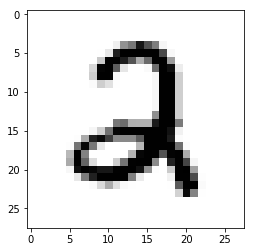

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

#MNIST 손글씨 데이터 로드, 읽었을 때 바로 one hot으로 처리 가능
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

nb_classes =10 #클래스 10개 의미
# MNIST data image of shape 28*28 = 784 (이미지 데이터가 28*28 픽셀 안에 있음)
X = tf.placeholder(tf.float32,[None, 784])
# 0 - 9 수. 10개의 출력이 나타나요
Y = tf.placeholder(tf.float32,[None,nb_classes])

W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

#softmax 사용
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

#합을 구해서 평균으로 내기
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1)) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis,1),tf.arg_max(Y,1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# parameters
#데이터의 양이 너무 많아서 한 번에 다 읽을 수 없기 때문에 batch를 이용해 조금씩 잘라옴
training_epochs = 15 # 1 epoch = 전체 데이터를 한 번 다 학습시킨 것
batch_size = 100 #한 번에 학습할 양. 100개의 training data 읽어오기
with tf.Session() as sess :

    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        #전체 데이터 개수를 batch 사이즈로 나눔.
        #(전체 데이터가 10000개고, batch 사이즈가 100일 때 100번 돌면 1epoch을 돌게 됨)
        total_batch = int(mnist.train.num_examples / batch_size)
        
        #이 루프를 한 번 돌 때마다 1 epoch가 끝나는 것을 의미함
        for i in range(total_batch): # iteration
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],feed_dict={X:batch_xs,Y:batch_ys})
            avg_cost += c / total_batch
        print('Epoch:','%04d'%(epoch+1),'cost =','{:.9f}'.format(avg_cost))
    
    # Training data가 아닌 test data를 이용하여 정확도 측정
    # sess.run() 으로 돌릴 수도 있고, accuracy.eval() <-으로 할 수도 있음
    print("Accuracy : ",accuracy.eval(session=sess,
                                      feed_dict={X:mnist.test.images,Y:mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0,mnist.test.num_examples -1)
    print("Label : ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction : ",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].
              reshape(28,28),cmap='Greys',interpolation='nearest')
    plt.show()